# Main US Indexes Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# data initialisation
def init_data(file_name):
    data = pd.read_csv('Data/'+file_name)
    data = data.set_index('Date')
    data.index = data.index.map(lambda x: str(x)[0:10])
    data.index = pd.to_datetime(data.index)
    return data

# to leave only close prices
def clear_columns(pd):
    return pd.drop(["high", "low", "open", "volume",
                    "Adj Close"], axis=1)

def create_one_attr_table(attribute, **kwargs):
    df = pd.DataFrame()
    for kw in kwargs:
        df[kw] = kwargs[kw][attribute]
    return df

In [4]:
# let's compare main US indexes
sp500_1d_data = init_data('SP500_1D.csv')
nasdaq_1d_data = init_data('NDAQ_1D.csv')
dowjones_1d_data = init_data('DowJones_1D.csv')
russell_1d_data = init_data('Russell2k_1D.csv')

In [5]:
def check_data(data):
    print('== header ==')
    print(data.head())
    print('== info ==')
    print(data.info())
    print('== shape ==')
    print(data.shape)
    print('== describe ==')
    print(data.describe())
    print('== qty of null and na ==')
    print(data.isnull().sum())
    print(data.isna().sum())
    print('== show rows with nan ==')
    print(data[data.isna().any(axis=1)])
    print('== check the inf values ==')
    print(np.isinf(data).any())
    print('== check the 0s values ==')
    print((data == 0).sum(axis=1).any())

In [6]:
check_data(sp500_1d_data)

== header ==
                 High        Low  Open      Close    Volume  Adj Close
Date                                                                  
1971-01-04  92.190002  90.639999   0.0  91.150002  10010000  91.150002
1971-01-05  92.279999  90.690002   0.0  91.800003  12600000  91.800003
1971-01-06  93.000000  91.500000   0.0  92.349998  16960000  92.349998
1971-01-07  93.260002  91.750000   0.0  92.379997  16460000  92.379997
1971-01-08  93.019997  91.599998   0.0  92.190002  14100000  92.190002
== info ==
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12842 entries, 1971-01-04 to 2021-11-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       12842 non-null  float64
 1   Low        12842 non-null  float64
 2   Open       12842 non-null  float64
 3   Close      12842 non-null  float64
 4   Volume     12842 non-null  int64  
 5   Adj Close  12842 non-null  float64
dtypes: float64(5), int64(1)
memor

In [7]:
check_data(nasdaq_1d_data)

== header ==
            High   Low  Open  Close   Volume  Adj Close
Date                                                   
2002-07-01  15.0  15.0  15.0  15.00   1300.0  12.745756
2002-07-02  16.5  15.0  15.5  15.13   7000.0  12.856216
2002-07-03  16.0  14.0  14.0  15.00  10200.0  12.745756
2002-07-05  15.0  15.0  15.0  15.00    500.0  12.745756
2002-07-08  14.0  14.0  14.0  14.00    300.0  11.896032
== info ==
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4890 entries, 2002-07-01 to 2021-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4890 non-null   float64
 1   Low        4890 non-null   float64
 2   Open       4890 non-null   float64
 3   Close      4890 non-null   float64
 4   Volume     4890 non-null   float64
 5   Adj Close  4890 non-null   float64
dtypes: float64(6)
memory usage: 267.4 KB
None
== shape ==
(4890, 6)
== describe ==
              High          Low         Open        Clos

In [8]:
check_data(dowjones_1d_data)

== header ==
                   High          Low         Open        Close    Volume  \
Date                                                                       
1992-01-02  3172.629883  3139.310059  3152.100098  3172.399902  23550000   
1992-01-03  3210.639893  3165.919922  3172.399902  3201.500000  23620000   
1992-01-06  3213.330078  3191.860107  3201.500000  3200.100098  27280000   
1992-01-07  3210.199951  3184.479980  3200.100098  3204.800049  25510000   
1992-01-08  3229.199951  3185.820068  3204.800049  3203.899902  29040000   

              Adj Close  
Date                     
1992-01-02  3172.399902  
1992-01-03  3201.500000  
1992-01-06  3200.100098  
1992-01-07  3204.800049  
1992-01-08  3203.899902  
== info ==
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7536 entries, 1992-01-02 to 2021-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       7536 non-null   float64
 1   Low        7

In [9]:
check_data(russell_1d_data)

== header ==
                  High         Low        Open       Close     Volume  \
Date                                                                    
1987-09-10  168.979996  167.440002  167.440002  168.970001  179800000   
1987-09-11  170.539993  168.750000  168.970001  170.539993  178000000   
1987-09-14  170.949997  170.149994  170.529999  170.429993  154400000   
1987-09-15  170.440002  169.130005  170.419998  169.199997  136200000   
1987-09-16  170.029999  168.820007  169.309998  168.919998  195700000   

             Adj Close  
Date                    
1987-09-10  168.970001  
1987-09-11  170.539993  
1987-09-14  170.429993  
1987-09-15  169.199997  
1987-09-16  168.919998  
== info ==
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8626 entries, 1987-09-10 to 2021-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       8626 non-null   float64
 1   Low        8626 non-null   float64
 2   

In [10]:
close_1d_data = create_one_attr_table('Close', SP500=sp500_1d_data, NASDAQ=nasdaq_1d_data, DowJones=dowjones_1d_data, Russell=russell_1d_data)

In [11]:
check_data(close_1d_data)

== header ==
                SP500  NASDAQ  DowJones  Russell
Date                                            
1971-01-04  91.150002     NaN       NaN      NaN
1971-01-05  91.800003     NaN       NaN      NaN
1971-01-06  92.349998     NaN       NaN      NaN
1971-01-07  92.379997     NaN       NaN      NaN
1971-01-08  92.190002     NaN       NaN      NaN
== info ==
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12842 entries, 1971-01-04 to 2021-11-21
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SP500     12842 non-null  float64
 1   NASDAQ    4884 non-null   float64
 2   DowJones  7530 non-null   float64
 3   Russell   8620 non-null   float64
dtypes: float64(4)
memory usage: 501.6 KB
None
== shape ==
(12842, 4)
== describe ==
              SP500       NASDAQ      DowJones      Russell
count  12842.000000  4884.000000   7530.000000  8620.000000
mean     941.332879    48.977805  12881.953092   698.449463
std      

In [12]:
close_1d_data.dropna(inplace=True)

In [13]:
check_data(close_1d_data)

== header ==
                 SP500  NASDAQ     DowJones     Russell
Date                                                   
2002-07-01  968.650024   15.00  9109.790039  447.730011
2002-07-02  948.090027   15.13  9007.750000  432.839996
2002-07-03  953.989990   15.00  9054.969727  429.470001
2002-07-05  989.030029   15.00  9379.500000  440.920013
2002-07-08  976.979980   14.00  9274.900391  433.609985
== info ==
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4884 entries, 2002-07-01 to 2021-11-19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SP500     4884 non-null   float64
 1   NASDAQ    4884 non-null   float64
 2   DowJones  4884 non-null   float64
 3   Russell   4884 non-null   float64
dtypes: float64(4)
memory usage: 190.8 KB
None
== shape ==
(4884, 4)
== describe ==
             SP500       NASDAQ      DowJones      Russell
count  4884.000000  4884.000000   4884.000000  4884.000000
mean   1820.597139    48

In [14]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

Text(0, 0.5, 'Price')

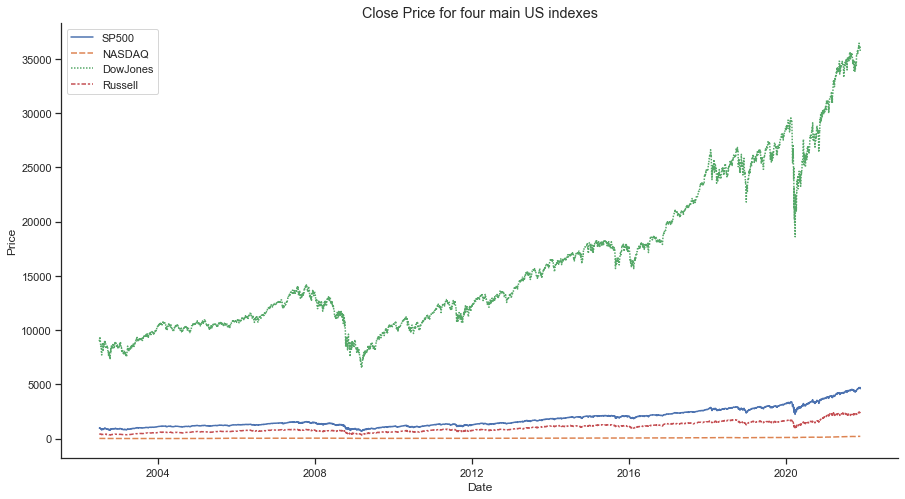

In [15]:
plt.figure(figsize=(15, 8))
plt.title('Close Price for four main US indexes', fontsize='large')
sns.lineplot(data=close_1d_data)
plt.ylabel('Price')

In [16]:
def min_max_scaler(df, a=0, b=1):
    df = a + ((df - np.min(df)) * (b - a) / (np.max(df) - np.min(df)))
    return df

In [17]:
close_1d_data_normalized = min_max_scaler(close_1d_data)

In [18]:
def get_ticks_labels_yearly(df):
    data = df.index[(df.index.isocalendar().week == 1) & (df.index.month == 1)].strftime('%Y.%m.%d').values
    year = ''
    labels = []
    ticks = []
    for _, date in enumerate(data):
        if year != date[:4]:
            labels.append(date)
            ticks.append(df.index.get_indexer_for((df.index[df.index == date]))[0])
            year = date[:4]
    return ticks, labels

Text(1, 0, 'Date')

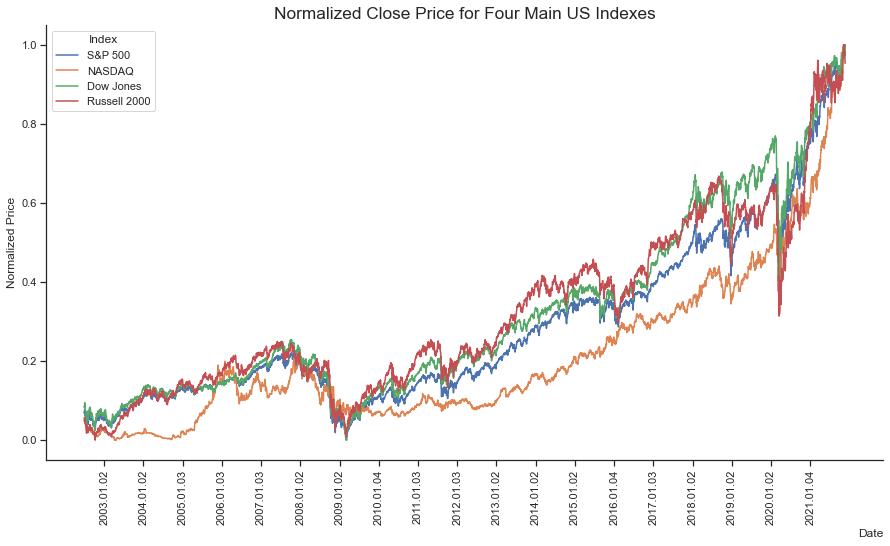

In [24]:
plt.figure(figsize=(15, 8))
plt.title('Normalized Close Price for Four Main US Indexes', fontsize='x-large')
sns.lineplot(data=close_1d_data_normalized.values, dashes=False)
plt.ylabel('Normalized Price')
plt.legend(['S&P 500', 'NASDAQ', 'Dow Jones', 'Russell 2000'], title='Index')
x_ticks, x_labels = get_ticks_labels_yearly(close_1d_data_normalized)
plt.xticks(ticks=x_ticks, labels=x_labels, rotation='vertical')
plt.xlabel('Date', loc='right')

Text(0, 0.5, 'Price')

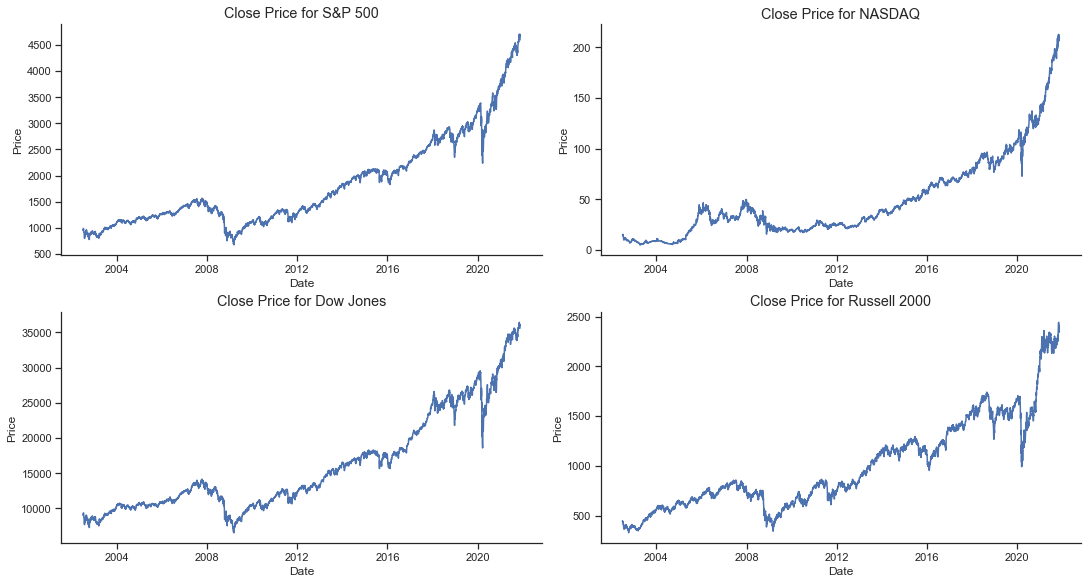

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), constrained_layout=True)

# S&P 500
sns.lineplot(ax=axs.flat[0], data=close_1d_data['SP500'], dashes=False)
axs.flat[0].set_title('Close Price for S&P 500', fontsize='large')
axs.flat[0].set_ylabel('Price')

# NASDAQ             
sns.lineplot(ax=axs.flat[1], data=close_1d_data['NASDAQ'], dashes=False)
axs.flat[1].set_title('Close Price for NASDAQ', fontsize='large')
axs.flat[1].set_ylabel('Price')

# Dow Jones
sns.lineplot(ax=axs.flat[2], data=close_1d_data['DowJones'], dashes=False)
axs.flat[2].set_title('Close Price for Dow Jones', fontsize='large')
axs.flat[2].set_ylabel('Price')

# Russell 2000
sns.lineplot(ax=axs.flat[3], data=close_1d_data['Russell'], dashes=False)
axs.flat[3].set_title('Close Price for Russell 2000', fontsize='large')
axs.flat[3].set_ylabel('Price')

In [15]:
price_changes = {}
for comp in close_1d_data.columns:
    price_changes[comp] = 100*(close_1d_data[comp][-1] - close_1d_data[comp][0])/close_1d_data[comp][0]
price_changes

{'SP500': 374.33231831762885,
 'NASDAQ': 1285.133361816406,
 'DowJones': 290.8101099596127,
 'Russell': 423.34216036747324}

Text(1, 0, 'Price Change [%]')

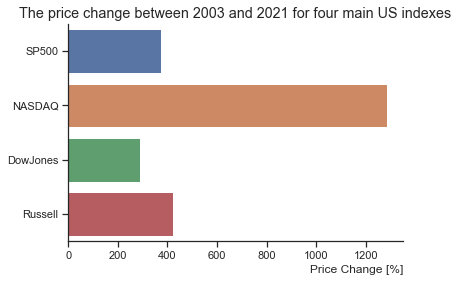

In [16]:
plt.title('The price change between 2003 and 2021 for four main US indexes', fontsize='large')
sns.barplot(x=list(price_changes.values()), y=list(price_changes.keys()))
plt.xlabel('Price Change [%]', loc='right')

In [17]:
# price changes per year
grouped_per_year = close_1d_data.groupby(pd.Grouper(freq='Y'))

In [18]:
# create the 1y close change table
columns = ['Date']+[x for x in close_1d_data.columns]
close_1y_data = pd.DataFrame(columns=columns)
for year_data in grouped_per_year:
    date = str(year_data[0])[:4]
    first_close_of_year = year_data[1].iloc[0] # would be better to take open instead of close
    last_close_of_year = year_data[1].iloc[-1]
    year_diff = 100*(last_close_of_year - first_close_of_year)/first_close_of_year
    close_1y_data = close_1y_data.append(
            pd.Series(
                [
                    date,
                    year_diff[0],
                    year_diff[1],
                    year_diff[2],
                    year_diff[3]
                ],
                index=columns
            ),
            ignore_index=True
        )
close_1y_data = close_1y_data.set_index('Date')

In [19]:
close_1y_data

,SP500,NASDAQ,DowJones,Russell
Date,,,,
2002,-9.170497,-33.333333,-8.432249,-14.437275
2003,22.319396,-7.804880,21.451016,41.858982
2004,9.331703,10.270268,3.584683,16.175454
2005,3.844177,246.601001,-0.111187,5.118351
2006,11.782786,-15.085487,14.895170,15.146552
2007,3.653820,59.593684,6.335320,-2.716461
2008,-37.584650,-48.766329,-32.716831,-33.720387
2009,19.671602,-24.148487,15.422326,23.633959
2010,11.001865,17.243082,9.387316,22.426192


[Text(0, 0, '2002'),
 Text(1, 0, '2003'),
 Text(2, 0, '2004'),
 Text(3, 0, '2005'),
 Text(4, 0, '2006'),
 Text(5, 0, '2007'),
 Text(6, 0, '2008'),
 Text(7, 0, '2009'),
 Text(8, 0, '2010'),
 Text(9, 0, '2011'),
 Text(10, 0, '2012'),
 Text(11, 0, '2013'),
 Text(12, 0, '2014'),
 Text(13, 0, '2015'),
 Text(14, 0, '2016'),
 Text(15, 0, '2017'),
 Text(16, 0, '2018'),
 Text(17, 0, '2019'),
 Text(18, 0, '2020'),
 Text(19, 0, '2021')]

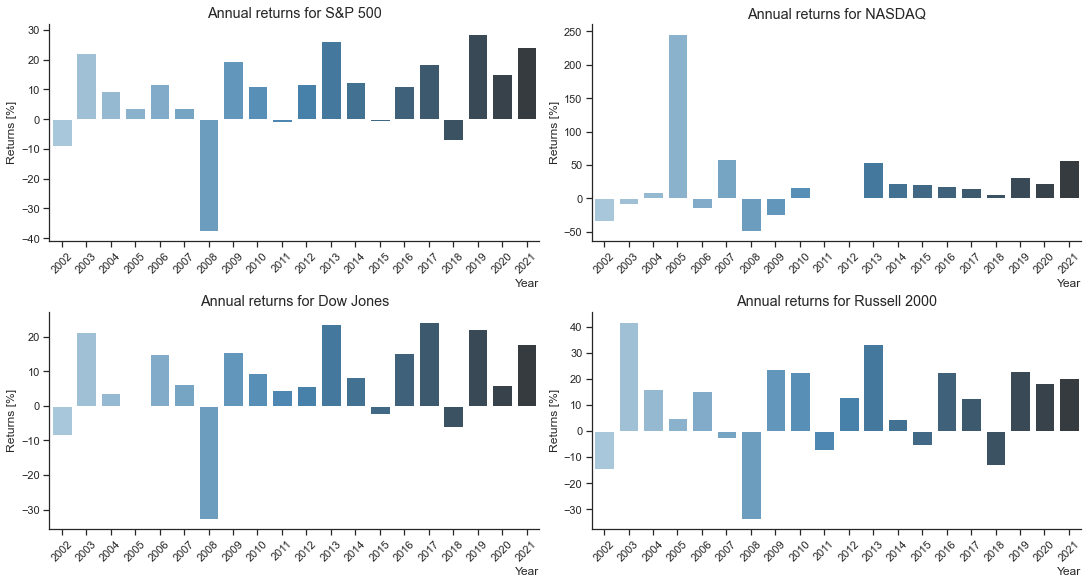

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), constrained_layout=True)

# S&P 500
sns.barplot(ax=axs.flat[0], x=close_1y_data.index, y=close_1y_data['SP500'], palette="Blues_d")
axs.flat[0].set_title('Annual returns for S&P 500', fontsize='large')
axs.flat[0].set_ylabel('Returns [%]')
axs.flat[0].set_xlabel('Year', loc='right')
axs.flat[0].set_xticklabels(labels=close_1y_data.index,rotation=45)

# NASDAQ             
sns.barplot(ax=axs.flat[1], x=close_1y_data.index, y=close_1y_data['NASDAQ'], palette="Blues_d")
axs.flat[1].set_title('Annual returns for NASDAQ', fontsize='large')
axs.flat[1].set_ylabel('Returns [%]')
axs.flat[1].set_xlabel('Year', loc='right')
axs.flat[1].set_xticklabels(labels=close_1y_data.index,rotation=45)

# Dow Jones
sns.barplot(ax=axs.flat[2], x=close_1y_data.index, y=close_1y_data['DowJones'], palette="Blues_d")
axs.flat[2].set_title('Annual returns for Dow Jones', fontsize='large')
axs.flat[2].set_ylabel('Returns [%]')
axs.flat[2].set_xlabel('Year', loc='right')
axs.flat[2].set_xticklabels(labels=close_1y_data.index,rotation=45)

# Russell 2000
sns.barplot(ax=axs.flat[3], x=close_1y_data.index, y=close_1y_data['Russell'], palette="Blues_d")
axs.flat[3].set_title('Annual returns for Russell 2000', fontsize='large')
axs.flat[3].set_ylabel('Returns [%]')
axs.flat[3].set_xlabel('Year', loc='right')
axs.flat[3].set_xticklabels(labels=close_1y_data.index,rotation=45)


In [21]:
# to check the best days and month in the all years (annualized and in general)

In [22]:
open_1d_data = create_one_attr_table('Open', SP500=sp500_1d_data, NASDAQ=nasdaq_1d_data, DowJones=dowjones_1d_data, Russell=russell_1d_data)

In [23]:
open_1d_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12842 entries, 1971-01-04 to 2021-11-21
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SP500     12842 non-null  float64
 1   NASDAQ    4884 non-null   float64
 2   DowJones  7530 non-null   float64
 3   Russell   8620 non-null   float64
dtypes: float64(4)
memory usage: 501.6 KB


In [24]:
open_1d_data.dropna(inplace=True)

In [25]:
price_change_1d_data = 100*(close_1d_data - open_1d_data)/open_1d_data

In [26]:
price_change_1d_data

,SP500,NASDAQ,DowJones,Russell
Date,,,,
2002-07-01,-2.138771,0.000000,-1.401196,-3.220715
2002-07-02,-2.122541,-2.387096,-1.067553,-3.325668
2002-07-03,0.622300,7.142857,0.539614,-0.778578
2002-07-05,3.672999,0.000000,3.508895,2.666080
2002-07-08,-1.218370,0.000000,-1.075118,-1.657903
...,...,...,...,...
2021-11-15,-0.222579,0.301286,-0.114532,-0.460610
2021-11-16,-0.616725,1.150030,0.183054,0.204988
2021-11-17,0.261201,-1.320798,-0.632329,-1.131347


In [27]:
price_change_1d_data['mm_dd'] = price_change_1d_data.index.map(lambda x: str(x)[5:10])
price_change_per_day = price_change_1d_data.groupby(['mm_dd']).mean()

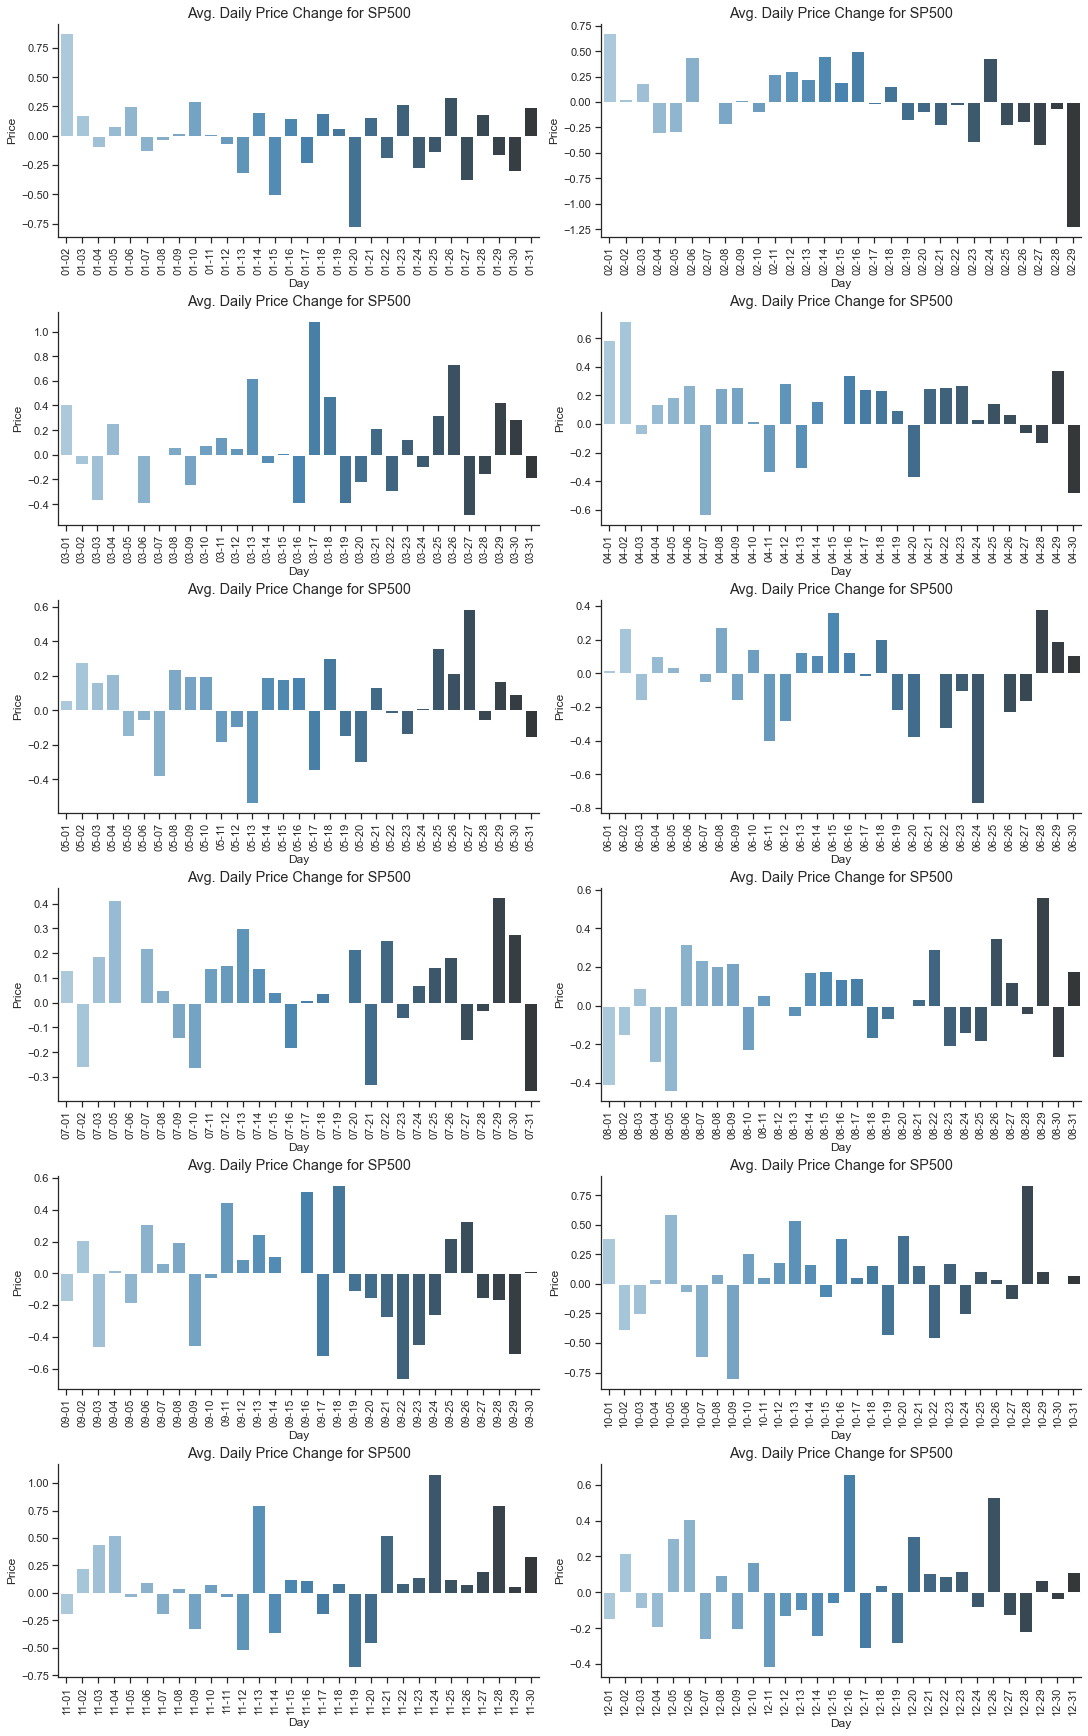

In [28]:
def show_avg_day_price_changes(df, comp):
    fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 24), constrained_layout=True)
    for i in range(12):
        month = '0'+str(i+1) if i < 9 else str(i+1)
        table = df[df.index.str.split('-').str[0] == month]
        sns.barplot(ax=axs.flat[i], x=table.index, y=table[comp], palette="Blues_d")
        axs.flat[i].set_title(f'Avg. Daily Price Change for {comp}', fontsize='large')
        axs.flat[i].set_ylabel('Price Change [%]')
        axs.flat[i].set_xlabel('Day')
        axs.flat[i].set_xticklabels(labels=table.index,rotation=90)

# S&P 500
show_avg_day_price_changes(price_change_per_day, 'SP500')

# # NASDAQ
# show_avg_day_price_changes(price_change_per_day, 'NASDAQ')

# # Dow Jones
# show_avg_day_price_changes(price_change_per_day, 'DowJones')

# # Russell 2000
# show_avg_day_price_changes(price_change_per_day, 'Russell')

In [29]:
for col in price_change_per_day.columns:
    print(price_change_per_day[col][price_change_per_day[col] == price_change_per_day[col].max()])

mm_dd
11-24    1.086658
Name: SP500, dtype: float64
mm_dd
11-26    2.393838
Name: NASDAQ, dtype: float64
mm_dd
03-17    1.054971
Name: DowJones, dtype: float64
mm_dd
11-24    1.558524
Name: Russell, dtype: float64


In [30]:
for col in price_change_1d_data.columns[:4]:
    print(price_change_1d_data[col][price_change_1d_data[col] == price_change_1d_data[col].max()])

Date
2008-10-28    10.789006
Name: SP500, dtype: float64
Date
2005-04-22    21.100091
Name: NASDAQ, dtype: float64
Date
2008-10-13    10.93293
Name: DowJones, dtype: float64
Date
2008-11-13    8.176614
Name: Russell, dtype: float64


In [31]:
# better to grab a 1M data and then take the mean
# if mean() we have avr. daily price change in the palticular month (month price change / days of the month)
# if sum() - the total month strength
price_change_1d_data['mm'] = price_change_1d_data.index.map(lambda x: str(x)[5:7])
price_change_per_month = price_change_1d_data.groupby(['mm']).sum()
price_change_per_month

,SP500,NASDAQ,DowJones,Russell
mm,,,,
01,-3.233260,46.548527,-12.758741,2.151631
02,9.750466,58.182540,7.724935,2.839317
03,25.680972,-0.534826,27.113461,16.512715
04,35.052090,48.198332,36.902102,27.417923
05,13.115236,12.238164,4.213625,23.039139
06,-10.417335,-55.342169,-10.429071,15.441449
07,21.069969,59.970225,27.179447,-2.014275
08,9.007170,-20.561133,1.094802,6.467863
09,-18.438495,25.022849,-10.969642,-8.434081


Text(0.5, 0, 'Month')

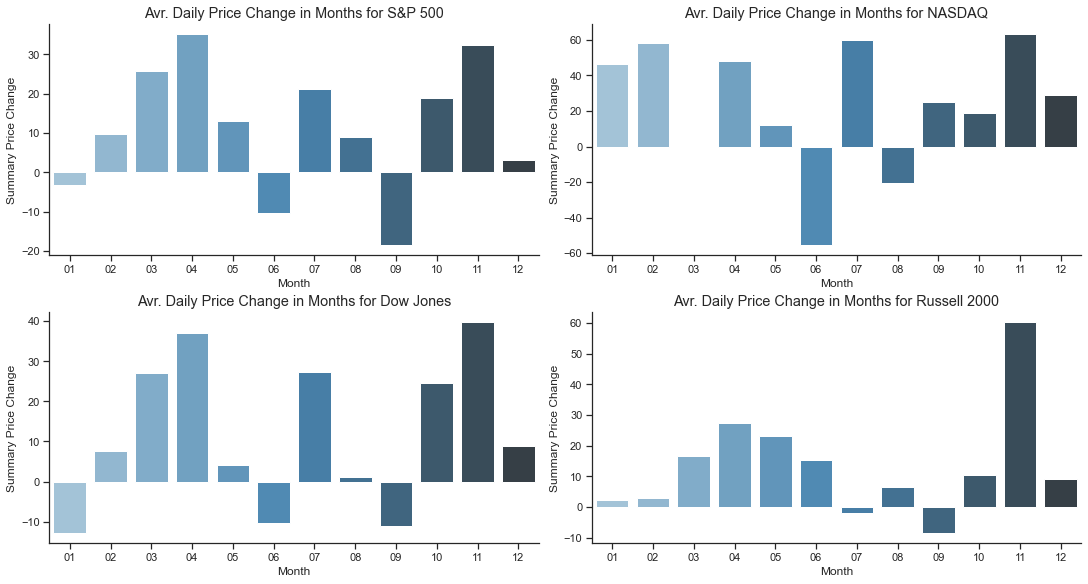

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), constrained_layout=True)

# S&P 500
sns.barplot(ax=axs.flat[0], x=price_change_per_month.index, y=price_change_per_month['SP500'], palette="Blues_d")
axs.flat[0].set_title('Avr. Daily Price Change in Months for S&P 500', fontsize='large')
axs.flat[0].set_ylabel('Summary Price Change')
# axs.flat[0].set_xticklabels(labels=price_change_per_month.index,rotation=45)
axs.flat[0].set_xlabel('Month')

# NASDAQ             
sns.barplot(ax=axs.flat[1], x=price_change_per_month.index, y=price_change_per_month['NASDAQ'], palette="Blues_d")
axs.flat[1].set_title('Avr. Daily Price Change in Months for NASDAQ', fontsize='large')
axs.flat[1].set_ylabel('Summary Price Change')
# axs.flat[1].set_xticklabels(labels=price_change_per_month.index,rotation=45)
axs.flat[1].set_xlabel('Month')

# Dow Jones
sns.barplot(ax=axs.flat[2], x=price_change_per_month.index, y=price_change_per_month['DowJones'], palette="Blues_d")
axs.flat[2].set_title('Avr. Daily Price Change in Months for Dow Jones', fontsize='large')
axs.flat[2].set_ylabel('Summary Price Change')
# axs.flat[2].set_xticklabels(labels=price_change_per_month.index,rotation=45)
axs.flat[2].set_xlabel('Month')

# Russell 2000
sns.barplot(ax=axs.flat[3], x=price_change_per_month.index, y=price_change_per_month['Russell'], palette="Blues_d")
axs.flat[3].set_title('Avr. Daily Price Change in Months for Russell 2000', fontsize='large')
axs.flat[3].set_ylabel('Summary Price Change')
# axs.flat[3].set_xticklabels(labels=price_change_per_month.index,rotation=45)
axs.flat[3].set_xlabel('Month')

In [33]:
# 'normal' dictribution of the price in last years and of the price change in general
grouped_per_year.count()

,SP500,NASDAQ,DowJones,Russell
Date,,,,
2002-12-31,128,128,128,128
2003-12-31,252,252,252,252
2004-12-31,252,252,252,252
2005-12-31,252,252,252,252
2006-12-31,251,251,251,251
2007-12-31,251,251,251,251
2008-12-31,253,253,253,253
2009-12-31,252,252,252,252
2010-12-31,252,252,252,252


Text(0.5, 0, 'Price')

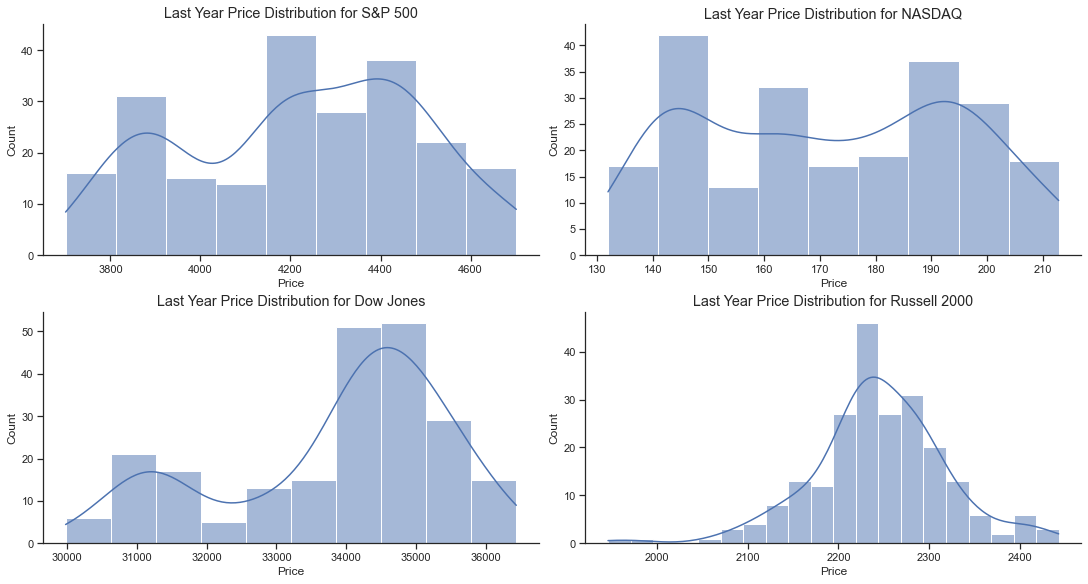

In [42]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), constrained_layout=True)
period = grouped_per_year.count().iloc[-1][0]

# S&P 500
sns.histplot(close_1d_data['SP500'][-period:], kde=True, ax=axs.flat[0])
axs.flat[0].set_title('Last Year Price Distribution for S&P 500', fontsize='large')
axs.flat[0].set_xlabel('Price')

# NASDAQ
sns.histplot(close_1d_data['NASDAQ'][-period:], kde=True, ax=axs.flat[1])
axs.flat[1].set_title('Last Year Price Distribution for NASDAQ', fontsize='large')
axs.flat[1].set_xlabel('Price')

# Dow Jones
sns.histplot(close_1d_data['DowJones'][-period:], kde=True, ax=axs.flat[2])
axs.flat[2].set_title('Last Year Price Distribution for Dow Jones', fontsize='large')
axs.flat[2].set_xlabel('Price')

# Russell 2000
sns.histplot(close_1d_data['Russell'][-period:], kde=True, ax=axs.flat[3])
axs.flat[3].set_title('Last Year Price Distribution for Russell 2000', fontsize='large')
axs.flat[3].set_xlabel('Price')

(-5.0, 5.0)

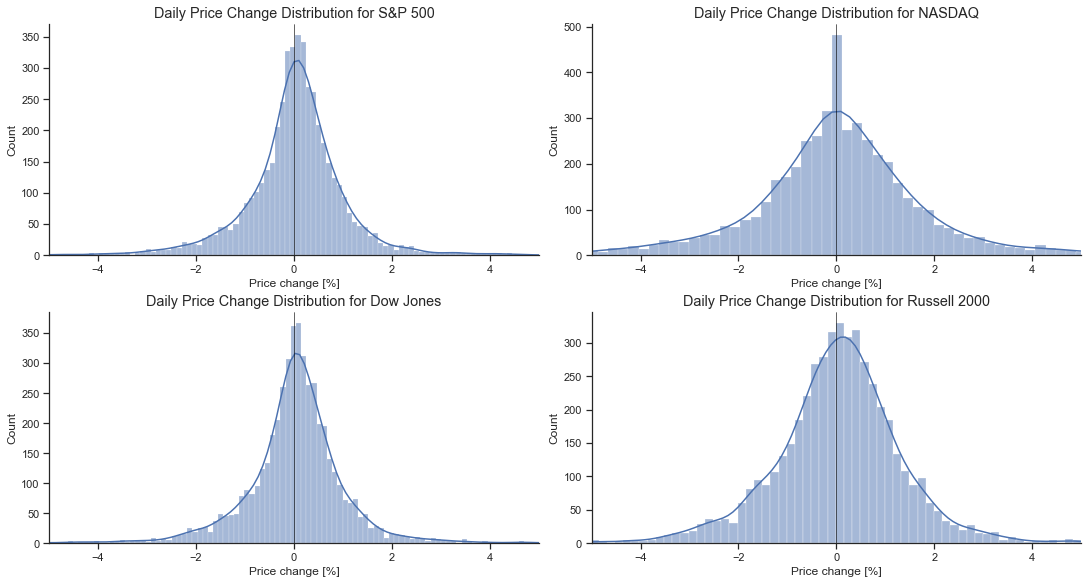

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), constrained_layout=True)

# S&P 500
sns.histplot(price_change_1d_data['SP500'], kde=True, ax=axs.flat[0])
axs.flat[0].axvline(color='Black', linewidth=0.6)
axs.flat[0].set_title('Daily Price Change Distribution for S&P 500', fontsize='large')
axs.flat[0].set_xlabel('Price change [%]')
axs.flat[0].set_xlim(-5, 5)

# NASDAQ
sns.histplot(price_change_1d_data['NASDAQ'], kde=True, ax=axs.flat[1])
axs.flat[1].axvline(color='Black', linewidth=0.6)
axs.flat[1].set_title('Daily Price Change Distribution for NASDAQ', fontsize='large')
axs.flat[1].set_xlabel('Price change [%]')
axs.flat[1].set_xlim(-5, 5)

# Dow Jones
sns.histplot(price_change_1d_data['DowJones'], kde=True, ax=axs.flat[2])
axs.flat[2].axvline(color='Black', linewidth=0.6)
axs.flat[2].set_title('Daily Price Change Distribution for Dow Jones', fontsize='large')
axs.flat[2].set_xlabel('Price change [%]')
axs.flat[2].set_xlim(-5, 5)

# Russell 2000
sns.histplot(price_change_1d_data['Russell'], kde=True, ax=axs.flat[3])
axs.flat[3].axvline(color='Black', linewidth=0.6)
axs.flat[3].set_title('Daily Price Change Distribution for Russell 2000', fontsize='large')
axs.flat[3].set_xlabel('Price change [%]')
axs.flat[3].set_xlim(-5, 5)

In [83]:
method = 'pearson'
corr_matrix = close_1d_data.corr(method=method)  # method='spearman' | method='kendall' | default: pearson
# corr_matrix['SP500'].sort_values(ascending=False)
corr_matrix

,SP500,NASDAQ,DowJones,Russell
SP500,1.000000,0.975649,0.994410,0.980917
NASDAQ,0.975649,1.000000,0.960770,0.938576
DowJones,0.994410,0.960770,1.000000,0.982425
Russell,0.980917,0.938576,0.982425,1.000000


<AxesSubplot:title={'center':'Heatmap for main US idexes'}>

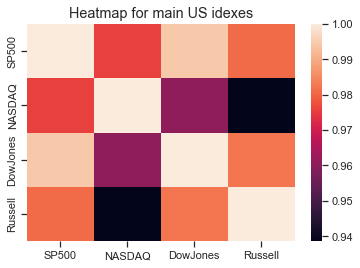

In [84]:
plt.title('Heatmap for main US idexes', fontsize='large')
sns.heatmap(data=corr_matrix)

In [77]:
from itertools import combinations
combs = combinations(close_1d_data.columns, 2)

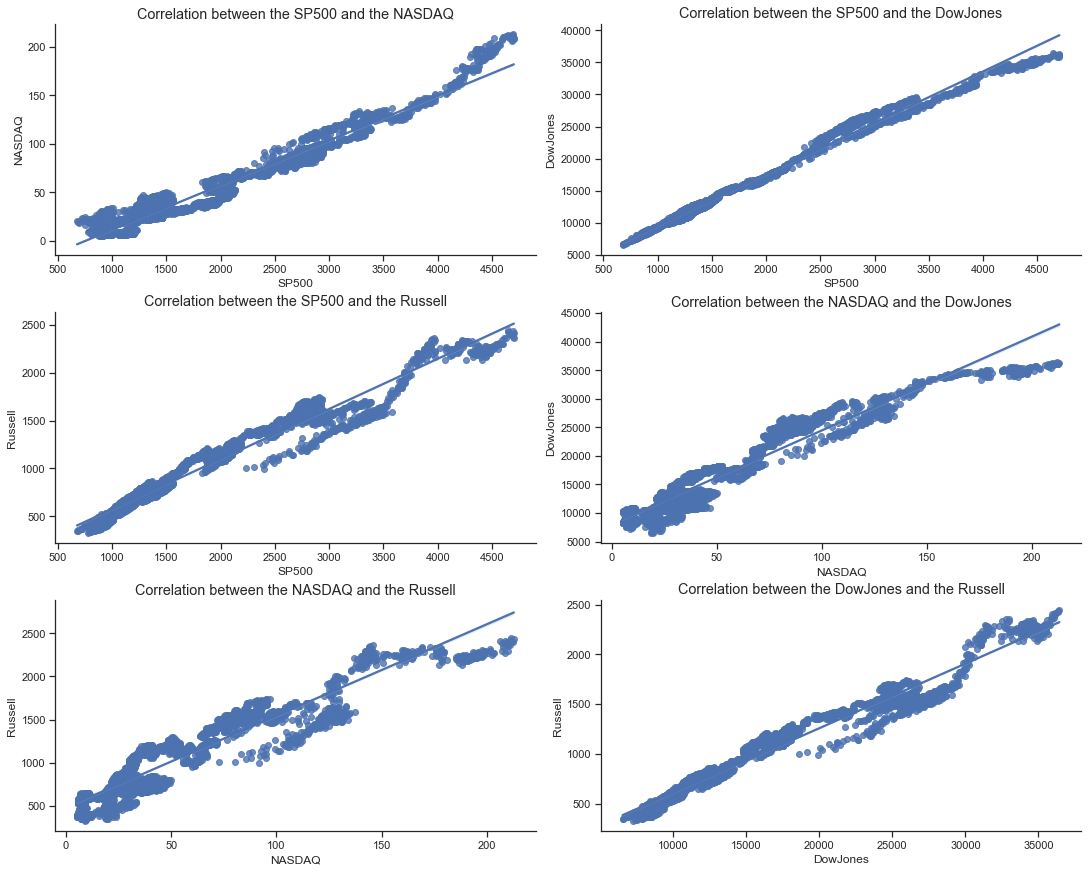

In [78]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12), constrained_layout=True)
for i, c in enumerate(combs):
    axs.flat[i].set_title(f'Correlation between the {c[0]} and the {c[1]}', fontsize='large')
    sns.regplot(x=close_1d_data[c[0]], y=close_1d_data[c[1]], ax=axs.flat[i])